In [1]:
# Required packages: PyTDC, DeepPurpose

In [2]:
# Load the DAVIS dataset from TDC project

from tdc.multi_pred import DTI as datasets
data = datasets(name = 'DAVIS').get_data()
X_drug, X_target, y = data['Drug'], data['Target'], data['Y']

Found local copy...
Loading...
Done!


In [3]:
# Prepare train, val, and test sub-sets 
# with Daylight encoding on molecule's SMILES string
# and AAC encoding on protein's sequence string

from DeepPurpose import utils, DTI
drug_encoding, target_encoding = 'Daylight', 'AAC'
train, val, test = utils.data_process(X_drug, X_target, y, 
    drug_encoding, target_encoding) 

Drug Target Interaction Prediction Mode...
in total: 25772 drug-target pairs
encoding drug...
unique drugs: 68
encoding protein...
unique target sequence: 379
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU.				 Calculate your time by the unique target sequence #, instead of the entire dataset.
splitting dataset...
Done.


Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 7120397. Total time 0.0 hours
Validation at Epoch 1 with loss:2361868, MSE: 2022795 , Pearson Correlation: -0.1162 with p-value: 3.27E-09 , Concordance Index: 0.42060
Training at Epoch 2 iteration 0 with loss 1829127. Total time 0.00388 hours
Validation at Epoch 2 with loss:1265792, MSE: 1717937 , Pearson Correlation: -0.0076 with p-value: 6.98E-01 , Concordance Index: 0.48901
Training at Epoch 3 iteration 0 with loss 1940287. Total time 0.0075 hours
Validation at Epoch 3 with loss:1076095, MSE: 1437778 , Pearson Correlation: 0.31780 with p-value: 1.44E-61 , Concordance Index: 0.67725
Training at Epoch 4 iteration 0 with loss 1471546. Total time 0.01138 hours
Validation at Epoch 4 with loss:1348573, MSE: 1158288 , Pearson Correlation: 0.52609 with p-value: 1.95E-183 , Concordance Index: 0.77860
Training at Epoch 5 iteration 0 with loss 1403538. Total time 0.01527 hours
Validation

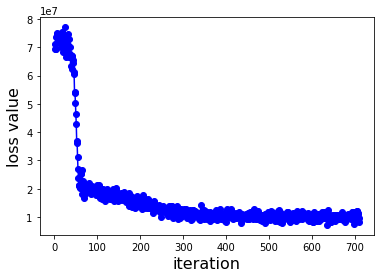

In [4]:
# Create a new model with default configuration options
# And train the model

config = utils.generate_config(drug_encoding, target_encoding)
model = DTI.model_initialize(**config)
model.train(train, val, test)

In [5]:
# Save the model

model.save_model('DAVIS-Daylight-AAC')